### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from datetime import datetime as dt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsa_plots
from pandas import Grouper
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Import Data

In [2]:
india = pd.read_csv('New India data _1980(csv).csv',index_col='Year',parse_dates=True,squeeze=True)
india

,"Inflation, average consumer prices(%)","Inflation, end of period consumer prices(%)"
Year,,
1980-01-01,11.346,12.819
1981-01-01,12.654,9.048
1982-01-01,7.736,10.420
1983-01-01,12.558,10.398
1984-01-01,6.517,5.144
1985-01-01,6.251,8.920
1986-01-01,8.889,7.464
1987-01-01,9.059,9.743
1988-01-01,7.214,5.040


In [3]:
india.shape

(43, 2)

In [4]:
india.dtypes

Inflation, average consumer prices(%)          float64
Inflation, end of period consumer prices(%)    float64
dtype: object

In [5]:
india.head()

,"Inflation, average consumer prices(%)","Inflation, end of period consumer prices(%)"
Year,,
1980-01-01,11.346,12.819
1981-01-01,12.654,9.048
1982-01-01,7.736,10.420
1983-01-01,12.558,10.398
1984-01-01,6.517,5.144


In [6]:
india.tail()

,"Inflation, average consumer prices(%)","Inflation, end of period consumer prices(%)"
Year,,
2018-01-01,3.428,2.465
2019-01-01,4.762,6.668
2020-01-01,6.175,4.867
2021-01-01,5.557,5.491
2022-01-01,4.876,4.910


In [7]:
india.isna().sum()

Inflation, average consumer prices(%)          0
Inflation, end of period consumer prices(%)    0
dtype: int64

In [8]:
india.describe(include='all')

,"Inflation, average consumer prices(%)","Inflation, end of period consumer prices(%)"
count,43.000000,43.000000
mean,7.569721,7.387140
std,3.023729,2.992753
min,3.428000,2.465000
25%,4.819000,4.975000
50%,6.842000,7.001000
75%,9.912500,9.432000
max,13.483000,15.019000


### Data Visualization

#### Line Plot

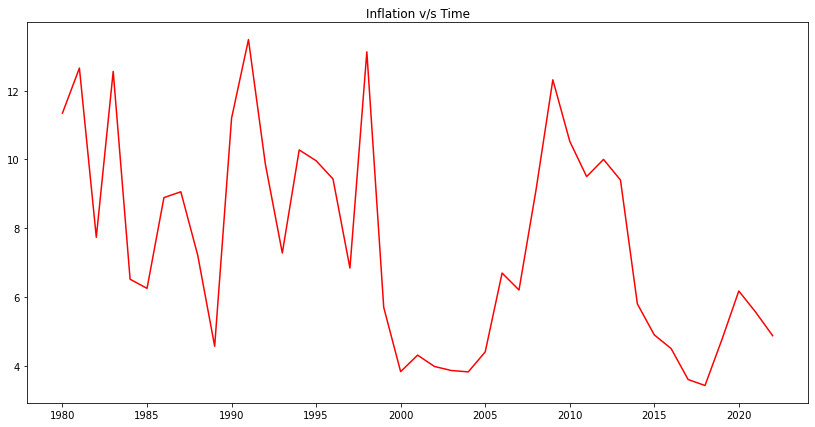

In [9]:
plt.figure(figsize=(14,7))
plt.plot(india['Inflation, average consumer prices(%)'],'r')
plt.title('Inflation v/s Time')
plt.show()

#### Checking DIstribution with *Histogram*

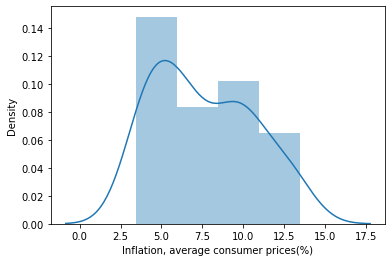

In [10]:
sns.distplot(india['Inflation, average consumer prices(%)'],)
plt.show()

#### Boxplot 

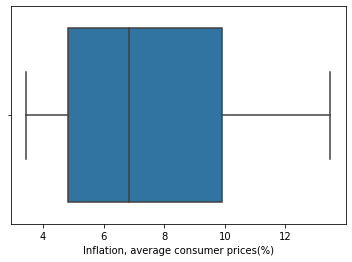

In [11]:
sns.boxplot(india['Inflation, average consumer prices(%)'])
plt.show()

### Data Preprocessing

In [12]:
india.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43 entries, 1980-01-01 to 2022-01-01
Data columns (total 2 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Inflation, average consumer prices(%)        43 non-null     float64
 1   Inflation, end of period consumer prices(%)  43 non-null     float64
dtypes: float64(2)
memory usage: 1.0 KB


In [13]:
india.drop('Inflation, end of period consumer prices(%)',axis=1,inplace=True)

In [14]:
india.dropna
india.index

DatetimeIndex(['1980-01-01', '1981-01-01', '1982-01-01', '1983-01-01',
               '1984-01-01', '1985-01-01', '1986-01-01', '1987-01-01',
               '1988-01-01', '1989-01-01', '1990-01-01', '1991-01-01',
               '1992-01-01', '1993-01-01', '1994-01-01', '1995-01-01',
               '1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01',
               '2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01',
               '2020-01-01', '2021-01-01', '2022-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

In [15]:
india['Year'] = pd.to_datetime(india.index,format='Y')
india['Year'] = india['Year'].dt.strftime('%Y')

In [16]:
india.head()

,"Inflation, average consumer prices(%)",Year
Year,,
1980-01-01,11.346,1980
1981-01-01,12.654,1981
1982-01-01,7.736,1982
1983-01-01,12.558,1983
1984-01-01,6.517,1984


In [17]:
india.rename(columns={'Inflation, average consumer prices(%)':'Inflation_rate'},inplace=True)
india.head()

,Inflation_rate,Year
Year,,
1980-01-01,11.346,1980
1981-01-01,12.654,1981
1982-01-01,7.736,1982
1983-01-01,12.558,1983
1984-01-01,6.517,1984


### Upsampling to get Monthly data

In [18]:
india_month = india.resample('M').mean()
india_month

,Inflation_rate
Year,
1980-01-31,11.346
1980-02-29,NaN
1980-03-31,NaN
1980-04-30,NaN
1980-05-31,NaN
...,...
2021-09-30,NaN
2021-10-31,NaN
2021-11-30,NaN


In [19]:
india_month_interpolated = india_month.interpolate(method='linear')
india_month_interpolated

,Inflation_rate
Year,
1980-01-31,11.34600
1980-02-29,11.45500
1980-03-31,11.56400
1980-04-30,11.67300
1980-05-31,11.78200
...,...
2021-09-30,5.10300
2021-10-31,5.04625
2021-11-30,4.98950


In [20]:
india_month_interpolated.head(24)

,Inflation_rate
Year,
1980-01-31,11.346000
1980-02-29,11.455000
1980-03-31,11.564000
1980-04-30,11.673000
1980-05-31,11.782000
1980-06-30,11.891000
1980-07-31,12.000000
1980-08-31,12.109000
1980-09-30,12.218000


In [21]:
india_month_interpolated.shape

(505, 1)

In [22]:
india_month_interpolated["t"] = np.arange(0,505)
india_month_interpolated["t_squared"] = india_month_interpolated["t"]*india_month_interpolated["t"]
india_month_interpolated["log_inflation"] = np.log(india_month_interpolated['Inflation_rate'])
india_month_interpolated.columns
india_month_interpolated.head()

,Inflation_rate,t,t_squared,log_inflation
Year,,,,
1980-01-31,11.346,0,0,2.428865
1980-02-29,11.455,1,1,2.438426
1980-03-31,11.564,2,4,2.447897
1980-04-30,11.673,3,9,2.457278
1980-05-31,11.782,4,16,2.466573


In [23]:
india_month_interpolated['Year']=pd.to_datetime(india_month_interpolated.index,format='Y')
india_month_interpolated['Month']=india_month_interpolated['Year'].dt.strftime('%b')
india_month_interpolated['year']=india_month_interpolated['Year'].dt.strftime('%Y')
india_month_interpolated.head()

,Inflation_rate,t,t_squared,log_inflation,Year,Month,year
Year,,,,,,,
1980-01-31,11.346,0,0,2.428865,1980-01-31,Jan,1980
1980-02-29,11.455,1,1,2.438426,1980-02-29,Feb,1980
1980-03-31,11.564,2,4,2.447897,1980-03-31,Mar,1980
1980-04-30,11.673,3,9,2.457278,1980-04-30,Apr,1980
1980-05-31,11.782,4,16,2.466573,1980-05-31,May,1980


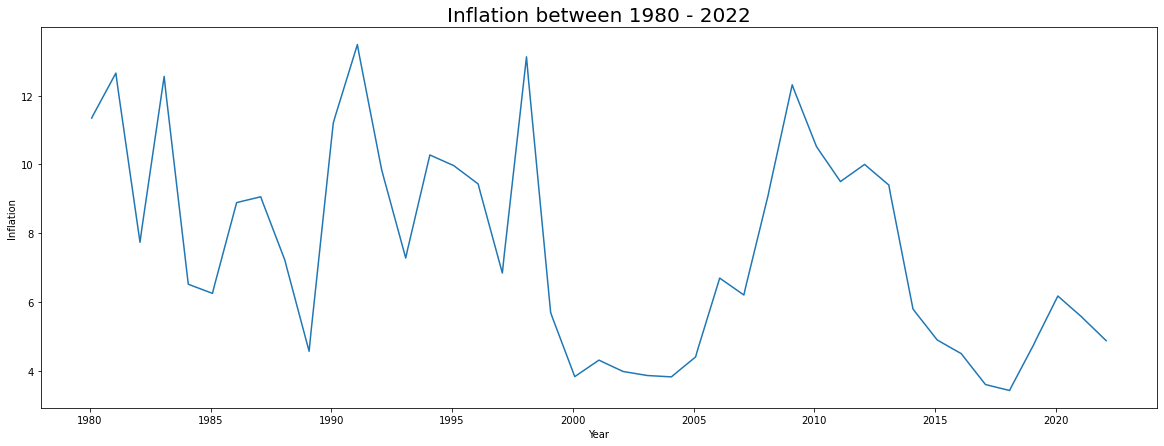

In [24]:
plt.figure(figsize = (20,7))
plt.plot(india_month_interpolated['Inflation_rate'])
plt.title('Inflation between 1980 - 2022',size = 20)
plt.xlabel('Year')
plt.ylabel('Inflation')
plt.show()

In [25]:
india_month_interpolated

,Inflation_rate,t,t_squared,log_inflation,Year,Month,year
Year,,,,,,,
1980-01-31,11.34600,0,0,2.428865,1980-01-31,Jan,1980
1980-02-29,11.45500,1,1,2.438426,1980-02-29,Feb,1980
1980-03-31,11.56400,2,4,2.447897,1980-03-31,Mar,1980
1980-04-30,11.67300,3,9,2.457278,1980-04-30,Apr,1980
1980-05-31,11.78200,4,16,2.466573,1980-05-31,May,1980
...,...,...,...,...,...,...,...
2021-09-30,5.10300,500,250000,1.629829,2021-09-30,Sep,2021
2021-10-31,5.04625,501,251001,1.618645,2021-10-31,Oct,2021
2021-11-30,4.98950,502,252004,1.607336,2021-11-30,Nov,2021


In [26]:
quarterly_inflation = india.resample('Q').mean()
quarterly_inflation

,Inflation_rate
Year,
1980-03-31,11.346
1980-06-30,NaN
1980-09-30,NaN
1980-12-31,NaN
1981-03-31,12.654
...,...
2021-03-31,5.557
2021-06-30,NaN
2021-09-30,NaN


In [27]:
india_quarter_interpolated =quarterly_inflation.interpolate(method='linear')
india_quarter_interpolated

,Inflation_rate
Year,
1980-03-31,11.34600
1980-06-30,11.67300
1980-09-30,12.00000
1980-12-31,12.32700
1981-03-31,12.65400
...,...
2021-03-31,5.55700
2021-06-30,5.38675
2021-09-30,5.21650


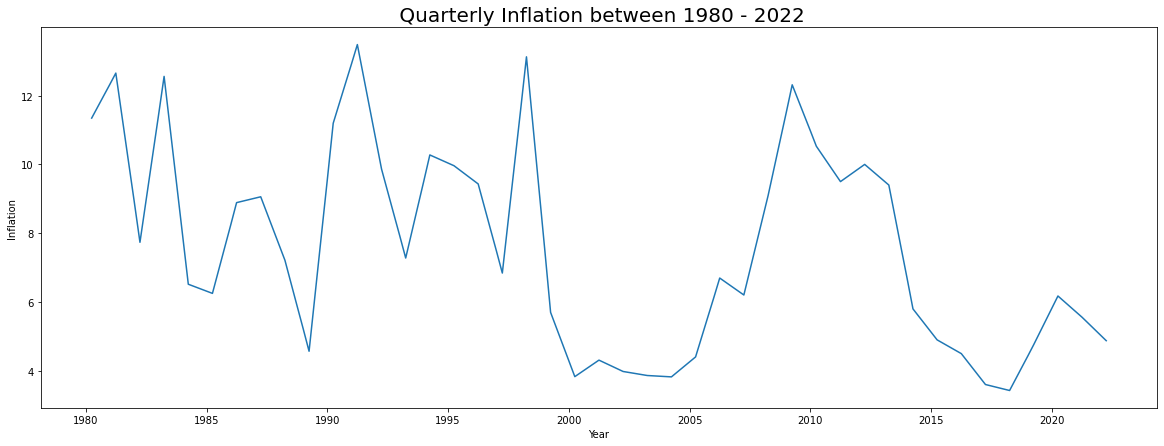

In [28]:
plt.figure(figsize = (20,7))
plt.plot(india_quarter_interpolated['Inflation_rate'])
plt.title(' Quarterly Inflation between 1980 - 2022',size = 20)
plt.xlabel('Year')
plt.ylabel('Inflation')
plt.show()

#### Yearly Boxplot

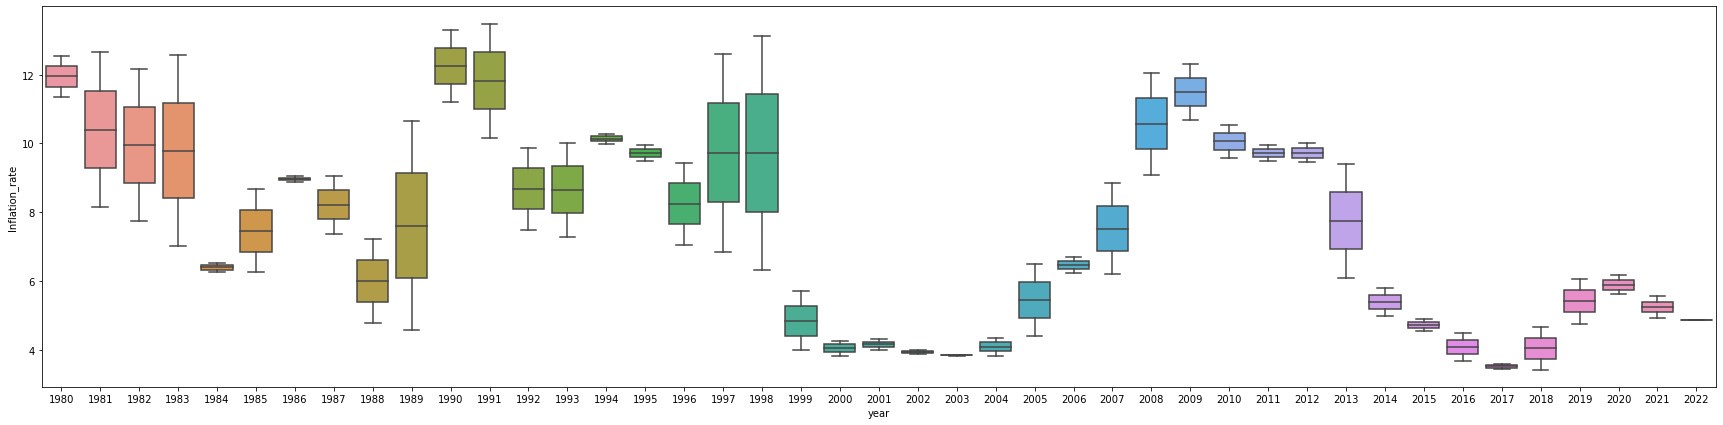

In [29]:
plt.figure(figsize=(30,7))
sns.boxplot(data=india_month_interpolated,x='year',y= 'Inflation_rate')
plt.show()

#### Monthly Boxplot

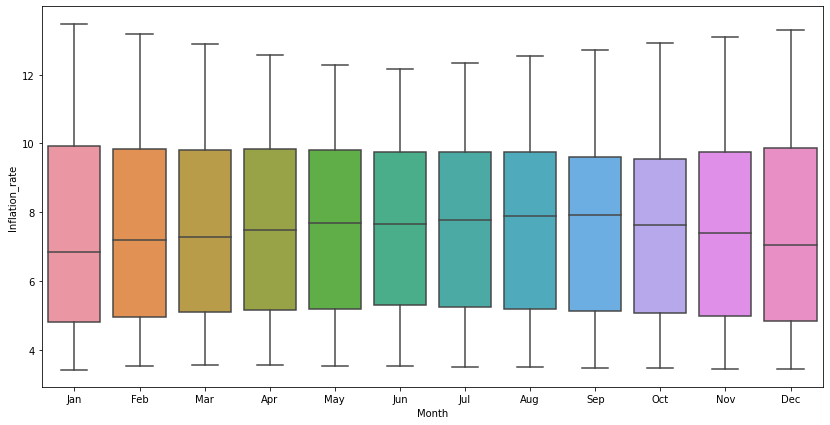

In [30]:
plt.figure(figsize=(14,7))
sns.boxplot(data=india_month_interpolated,x='Month',y= 'Inflation_rate')
plt.show()

In [31]:
india_month_interpolated

,Inflation_rate,t,t_squared,log_inflation,Year,Month,year
Year,,,,,,,
1980-01-31,11.34600,0,0,2.428865,1980-01-31,Jan,1980
1980-02-29,11.45500,1,1,2.438426,1980-02-29,Feb,1980
1980-03-31,11.56400,2,4,2.447897,1980-03-31,Mar,1980
1980-04-30,11.67300,3,9,2.457278,1980-04-30,Apr,1980
1980-05-31,11.78200,4,16,2.466573,1980-05-31,May,1980
...,...,...,...,...,...,...,...
2021-09-30,5.10300,500,250000,1.629829,2021-09-30,Sep,2021
2021-10-31,5.04625,501,251001,1.618645,2021-10-31,Oct,2021
2021-11-30,4.98950,502,252004,1.607336,2021-11-30,Nov,2021


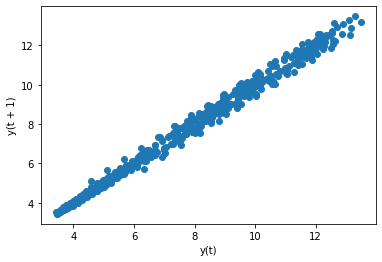

In [32]:
lag_plot(india_month_interpolated['Inflation_rate'])
plt.show()

### ACF abd PACF plot

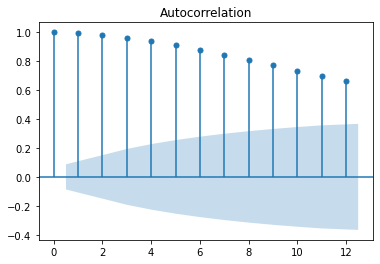

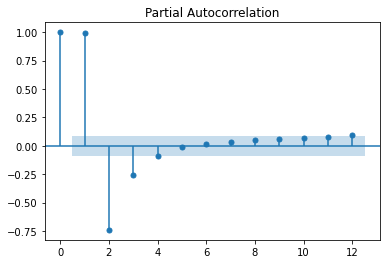

In [33]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(india_month_interpolated.Inflation_rate,lags=12)
tsa_plots.plot_pacf(india_month_interpolated.Inflation_rate,lags=12)
plt.show()

### Time series decomposition plot

<Figure size 2160x1080 with 0 Axes>

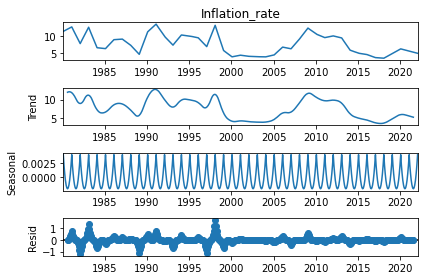

In [34]:
plt.figure(figsize=(30,15))
decompose_ts_add = seasonal_decompose(india_month_interpolated['Inflation_rate'],period=12)
decompose_ts_add.plot()
plt.show()

In [35]:
dummies=pd.DataFrame(pd.get_dummies(india_month_interpolated['Month']))
india_month_interpolated=pd.concat([india_month_interpolated,dummies],axis=1)
india_month_interpolated.head()

,Inflation_rate,t,t_squared,log_inflation,Year,Month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,,,,,,,,
1980-01-31,11.346,0,0,2.428865,1980-01-31,Jan,1980,0,0,0,0,1,0,0,0,0,0,0,0
1980-02-29,11.455,1,1,2.438426,1980-02-29,Feb,1980,0,0,0,1,0,0,0,0,0,0,0,0
1980-03-31,11.564,2,4,2.447897,1980-03-31,Mar,1980,0,0,0,0,0,0,0,1,0,0,0,0
1980-04-30,11.673,3,9,2.457278,1980-04-30,Apr,1980,1,0,0,0,0,0,0,0,0,0,0,0
1980-05-31,11.782,4,16,2.466573,1980-05-31,May,1980,0,0,0,0,0,0,0,0,1,0,0,0


In [36]:
inflation_pivot =pd.pivot_table(data= india_month_interpolated,values='Inflation_rate',index='year',columns='Month').fillna(0)
inflation_pivot

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1980,11.67300,12.109000,12.545000,11.455000,11.346,12.0000,11.891000,11.564000,11.782000,12.436000,12.32700,12.218000
1981,11.42450,9.785167,8.145833,12.244167,12.654,10.1950,10.604833,11.834333,11.014667,8.555667,8.96550,9.375333
1982,8.94150,10.548833,12.156167,8.137833,7.736,10.1470,9.745167,8.539667,9.343333,11.754333,11.35250,10.950667
1983,11.04775,9.034083,7.020417,12.054583,12.558,9.5375,10.040917,11.551167,10.544333,7.523833,8.02725,8.530667
1984,6.45050,6.361833,6.273167,6.494833,6.517,6.3840,6.406167,6.472667,6.428333,6.295333,6.31750,6.339667
1985,6.91050,7.789833,8.669167,6.470833,6.251,7.5700,7.350167,6.690667,7.130333,8.449333,8.22950,8.009667
1986,8.93150,8.988167,9.044833,8.903167,8.889,8.9740,8.959833,8.917333,8.945667,9.030667,9.01650,9.002333
1987,8.59775,7.982750,7.367750,8.905250,9.059,8.1365,8.290250,8.751500,8.444000,7.521500,7.67525,7.829000
1988,6.55275,5.671083,4.789417,6.993583,7.214,5.8915,6.111917,6.773167,6.332333,5.009833,5.23025,5.450667


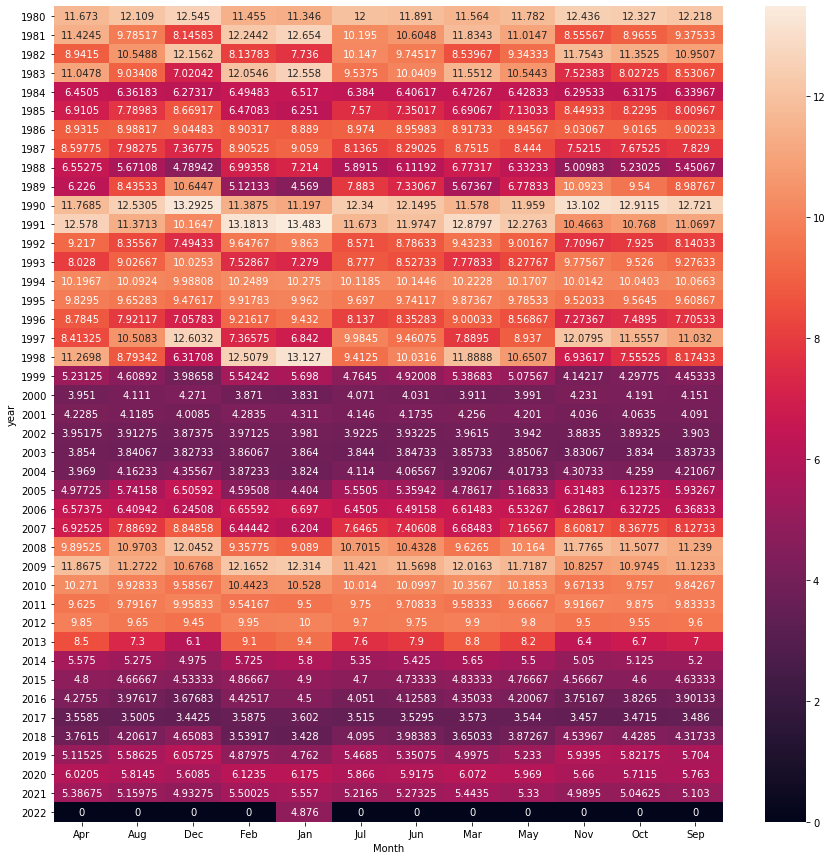

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(inflation_pivot,annot=True,fmt='g')
plt.show()

### Data Preparation

### Dividing the Data into Train and Test Data

In [38]:
india_month_interpolated.shape

(505, 19)

In [39]:
train_data = india_month_interpolated.head(455)
train_data

,Inflation_rate,t,t_squared,log_inflation,Year,Month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,,,,,,,,
1980-01-31,11.3460,0,0,2.428865,1980-01-31,Jan,1980,0,0,0,0,1,0,0,0,0,0,0,0
1980-02-29,11.4550,1,1,2.438426,1980-02-29,Feb,1980,0,0,0,1,0,0,0,0,0,0,0,0
1980-03-31,11.5640,2,4,2.447897,1980-03-31,Mar,1980,0,0,0,0,0,0,0,1,0,0,0,0
1980-04-30,11.6730,3,9,2.457278,1980-04-30,Apr,1980,1,0,0,0,0,0,0,0,0,0,0,0
1980-05-31,11.7820,4,16,2.466573,1980-05-31,May,1980,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-07-31,3.5150,450,202500,1.257040,2017-07-31,Jul,2017,0,0,0,0,0,1,0,0,0,0,0,0
2017-08-31,3.5005,451,203401,1.252906,2017-08-31,Aug,2017,0,1,0,0,0,0,0,0,0,0,0,0
2017-09-30,3.4860,452,204304,1.248755,2017-09-30,Sep,2017,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
train_data.tail()

,Inflation_rate,t,t_squared,log_inflation,Year,Month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,,,,,,,,
2017-07-31,3.5150,450,202500,1.257040,2017-07-31,Jul,2017,0,0,0,0,0,1,0,0,0,0,0,0
2017-08-31,3.5005,451,203401,1.252906,2017-08-31,Aug,2017,0,1,0,0,0,0,0,0,0,0,0,0
2017-09-30,3.4860,452,204304,1.248755,2017-09-30,Sep,2017,0,0,0,0,0,0,0,0,0,0,0,1
2017-10-31,3.4715,453,205209,1.244587,2017-10-31,Oct,2017,0,0,0,0,0,0,0,0,0,0,1,0
2017-11-30,3.4570,454,206116,1.240401,2017-11-30,Nov,2017,0,0,0,0,0,0,0,0,0,1,0,0


In [41]:
test_data =india_month_interpolated.tail(50)
test_data

,Inflation_rate,t,t_squared,log_inflation,Year,Month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,,,,,,,,
2017-12-31,3.442500,455,207025,1.236198,2017-12-31,Dec,2017,0,0,1,0,0,0,0,0,0,0,0,0
2018-01-31,3.428000,456,207936,1.231977,2018-01-31,Jan,2018,0,0,0,0,1,0,0,0,0,0,0,0
2018-02-28,3.539167,457,208849,1.263891,2018-02-28,Feb,2018,0,0,0,1,0,0,0,0,0,0,0,0
2018-03-31,3.650333,458,209764,1.294818,2018-03-31,Mar,2018,0,0,0,0,0,0,0,1,0,0,0,0
2018-04-30,3.761500,459,210681,1.324818,2018-04-30,Apr,2018,1,0,0,0,0,0,0,0,0,0,0,0
2018-05-31,3.872667,460,211600,1.353943,2018-05-31,May,2018,0,0,0,0,0,0,0,0,1,0,0,0
2018-06-30,3.983833,461,212521,1.382245,2018-06-30,Jun,2018,0,0,0,0,0,0,1,0,0,0,0,0
2018-07-31,4.095000,462,213444,1.409767,2018-07-31,Jul,2018,0,0,0,0,0,1,0,0,0,0,0,0
2018-08-31,4.206167,463,214369,1.436552,2018-08-31,Aug,2018,0,1,0,0,0,0,0,0,0,0,0,0


### Model Building

#### Linear Regression Method 

In [42]:
# Linear Model

import numpy as np
import statsmodels.formula.api as smf

# Training Data
linear_model = smf.ols('Inflation_rate~t',data = train_data).fit()

# Testing Data
linear_pred = pd.Series(linear_model.predict(test_data['t']))

# Evaluation
rmse_linear = np.sqrt(np.mean((np.array(test_data['Inflation_rate'])-np.array(linear_pred))**2))
rmse_linear

1.0793343945330967

#### Exponential Model

In [43]:
# Exponential Model 

import numpy as np
import statsmodels.formula.api as smf

# Training Data
exp_model = smf.ols('log_inflation~t',data = train_data).fit()

# Testing Data
exp_pred = pd.Series(exp_model.predict(test_data['t']))

# Evaluation
rmse_Exp = np.sqrt(np.mean((np.array(test_data['Inflation_rate'])-np.array(np.exp(exp_pred)))**2))
rmse_Exp

0.8796098375669068

#### Quadratic Model

In [44]:
#Quadratic 

Quad = smf.ols('Inflation_rate~t+t_squared',data=train_data).fit()
pred_Quad = pd.Series(Quad.predict(test_data[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test_data['Inflation_rate'])-np.array(pred_Quad))**2))
rmse_Quad

1.4342920344745687

#### Additive Seasonality

In [45]:
#Additive seasonality 

add_sea = smf.ols('Inflation_rate~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea = pd.Series(add_sea.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test_data['Inflation_rate'])-np.array(pred_add_sea))**2))
rmse_add_sea

2.8320034105822045

#### Additive Seasonality Quadratic

In [46]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Inflation_rate~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test_data['Inflation_rate'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

1.4391294500960938

#### Multiplicative Seasonality

In [47]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_inflation~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test_data))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test_data['Inflation_rate'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

2.3236474505825337

#### Multiplicative Additive Seasonality  

In [48]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_inflation~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test_data))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test_data['Inflation_rate'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

0.8807784477987486

#### Compare the results 

In [49]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
1,rmse_Exp,0.879610
6,rmse_Mult_add_sea,0.880778
0,rmse_linear,1.079334
2,rmse_Quad,1.434292
4,rmse_add_sea_quad,1.439129
5,rmse_Mult_sea,2.323647
3,rmse_add_sea,2.832003
